# Covid-19 Vaccine Tweets with Sentiment Annotation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

k=KNeighborsClassifier()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
l=LogisticRegression()
mb=MultinomialNB()
    
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("covid-19_vaccine_tweets_with_sentiment.csv",encoding="iso-8859-1")#https://www.kaggle.com/datasets/datasciencetool/covid19-vaccine-tweets-with-sentiment-annotation

In [5]:
df #Negative = 1, neutral = 2, positive = 3

,tweet_id,label,tweet_text
0,1.360342e+18,1,"4,000 a day dying from the so called Covid-19 ..."
1,1.382896e+18,2,Pranam message for today manifested in Dhyan b...
2,1.375673e+18,2,Hyderabad-based ?@BharatBiotech? has sought fu...
3,1.381311e+18,1,"Confirmation that Chinese #vaccines ""dont hav..."
4,1.362166e+18,3,"Lab studies suggest #Pfizer, #Moderna vaccines..."
...,...,...,...
5995,1.370975e+18,2,@Swamy39 Dr. @Swamy39 jee :\n\nMany people lik...
5996,1.379827e+18,3,So happy to be fully vaccinated against COVID-...
5997,1.384789e+18,2,Serum Institute of India announces cost of Cov...
5998,1.382355e+18,1,@___batshitcrazy @BarrowfordHead @Bectully I h...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    6000 non-null   float64
 1   label       6000 non-null   int64  
 2   tweet_text  6000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 140.8+ KB


In [7]:
df["tweet_text"]=df["tweet_text"].str.lower() #We convert our texts to lowercase.
df["tweet_text"]=df["tweet_text"].str.replace("[^\w\s]","") #We remove punctuation marks from our texts.
df["tweet_text"]=df["tweet_text"].str.replace("\d+","") #We are removing numbers from our texts.
df["tweet_text"]=df["tweet_text"].str.replace("\n","").replace("\r","") #We remove spaces in our texts.
df_neutral=df[df['label']==2]
df_positive=df[df['label']==3]
df_negative=df[df['label']==1]
df1=df[df['label']!=2]
#We divide tweets into 3 groups: positive, negative and neutral.

In [8]:
vect=CountVectorizer(lowercase=True,stop_words="english")
x=df1.tweet_text
y=df1.label
x=vect.fit_transform(x)

In [9]:
def sentiment_classification_funct(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    k=KNeighborsClassifier()
    d=DecisionTreeClassifier()
    r=RandomForestClassifier()
    l=LogisticRegression()
    mb=MultinomialNB()
    
    algos=[k,d,r,l,mb]
    algo_names=['KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','MultinomialNB']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
        
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result.f1_score=f1_scored
    result.recall_score=recall_scored
    result.precision_score=precision_scored
    result.accuracy_score=accuracy_scored
    sentiment_classification_funct.result=result.sort_values('f1_score',ascending=False)
    return result.sort_values('f1_score',ascending=False)

In [10]:
sentiment_classification_funct(x,y)

(1856, 9508) (464, 9508) (1856,) (464,)


,f1_score,recall_score,precision_score,accuracy_score
MultinomialNB,0.500000,0.435294,0.587302,0.840517
LogisticRegression,0.400000,0.282353,0.685714,0.844828
DecisionTreeClassifier,0.372414,0.317647,0.450000,0.803879
RandomForestClassifier,0.233010,0.141176,0.666667,0.829741
KNeighborsClassifier,0.000000,0.000000,0.000000,0.812500


In [11]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("Syringe.png"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")
#We draw the most used words in tweets on a syringe.

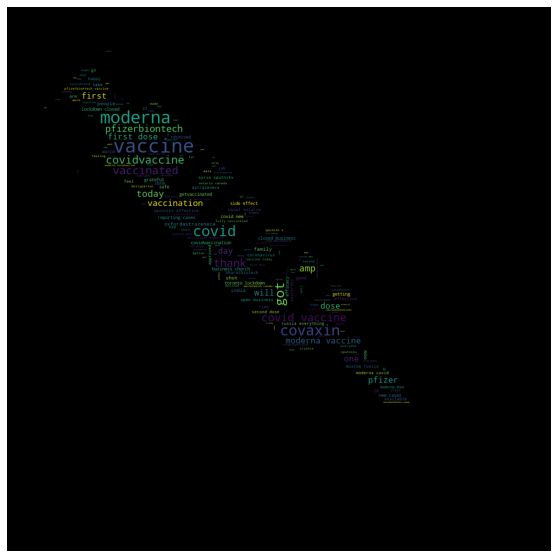

In [17]:
wc(df_positive.tweet_text,"black")##Positive

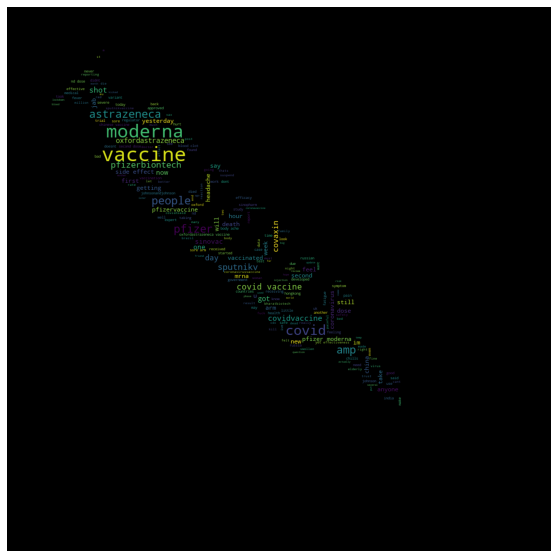

In [14]:
wc(df_negative.tweet_text,"black")##Negative

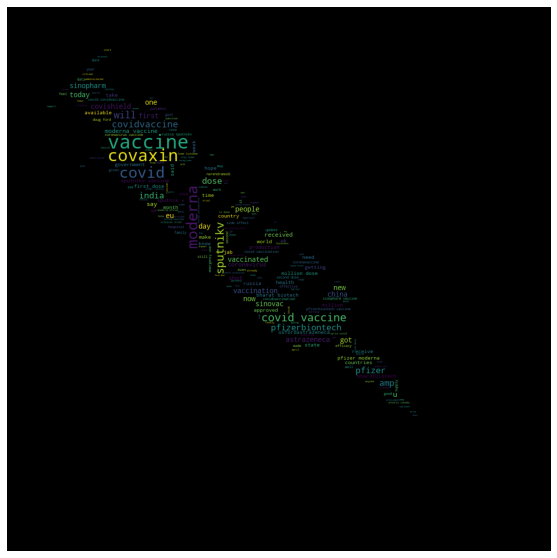

In [16]:
wc(df_neutral.tweet_text,"black")##Neutral

In [18]:
sent=df[["label","tweet_text"]]

In [20]:
def detect_sentiment(tweet_text):
    return TextBlob(tweet_text).sentiment.polarity
#We are doing our sentiment analysis.

In [21]:
sent["sentiment"]=sent["tweet_text"].apply(detect_sentiment)
sent.head()

,label,tweet_text,sentiment
0,1,a day dying from the so called covid vaccine ...,0.000000
1,2,pranam message for today manifested in dhyan b...,0.450000
2,2,hyderabadbased bharatbiotech has sought funds ...,0.100000
3,1,confirmation that chinese vaccines dont have v...,0.069333
4,3,lab studies suggest pfizer moderna vaccines ca...,0.000000


In [22]:
def sentiment2(sent):
    if (sent< -0.02):
        return 1
    elif sent>0.02:
        return 3
    else:
        return 2
#We divide the texts into three groups positive, negative and nötr.

In [23]:
sent["sent"]=sent["sentiment"].apply(sentiment2)
sent.head()

,label,tweet_text,sentiment,sent
0,1,a day dying from the so called covid vaccine ...,0.000000,2
1,2,pranam message for today manifested in dhyan b...,0.450000,3
2,2,hyderabadbased bharatbiotech has sought funds ...,0.100000,3
3,1,confirmation that chinese vaccines dont have v...,0.069333,3
4,3,lab studies suggest pfizer moderna vaccines ca...,0.000000,2


In [24]:
sent.sentiment.value_counts()

 0.000000    2136
 0.250000     329
 0.500000     184
 0.200000     129
 0.125000      95
             ... 
 0.066667       1
 0.478571       1
-0.170833       1
-0.329167       1
 0.071429       1
Name: sentiment, Length: 984, dtype: int64

In [25]:
sent.sent.value_counts()

3    2926
2    2235
1     839
Name: sent, dtype: int64

In [27]:
sent_neutral=sent[sent['sent']==2]
sent_positive=sent[sent['sent']==3]
sent_negative=sent[sent['sent']==1]
sent1=sent[sent['sent']!=2]

In [29]:
vect=CountVectorizer(lowercase=True,stop_words="english")
a=sent1.tweet_text
b=sent1.sent
a=vect.fit_transform(a)

In [30]:
sentiment_classification_funct(a,b)

(3012, 15723) (753, 15723) (3012,) (753,)


,f1_score,recall_score,precision_score,accuracy_score
LogisticRegression,0.489960,0.365269,0.743902,0.831341
DecisionTreeClassifier,0.472050,0.455090,0.490323,0.774236
MultinomialNB,0.448399,0.377246,0.552632,0.794157
RandomForestClassifier,0.394737,0.269461,0.737705,0.816733
KNeighborsClassifier,0.174359,0.101796,0.607143,0.786189
